<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [18]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import os

import networkx as nx

from border import Border
import constants as cs
from agent import Agent
import aux as aux

##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

def norm(array):
    return np.sqrt(array[0]**2 + array[1]**2)

fontsize = 14
labelsize = 14
pad = 6
color = "mediumvioletred"
cmap = matplotlib.cm.get_cmap("viridis")


In [ ]:
# Make an agent walk through the environment and calculate the total repulsion force:

# Define moving agent:
uid = 0
desired_direction = np.array([0, -1])
position = np.array([-2,-2])
adapt = False
from_zero = False
turns = False
agent0 = Agent(uid, position, desired_direction, from_zero, adapt, turns)

# Define fixed agent:
uid = 1
desired_direction = np.array([0,1])
position = np.array([0,0])
adapt = False
from_zero = False
turns = False
agent1 = Agent(uid, position, desired_direction, from_zero, adapt, turns)

def angle_of_view(e, f):

    norm_f = norm(f)
    w = np.dot(e, f)

    if w > norm_f*np.cos(cs.PHI):
        return cs.C
    else:
        return 1



cs.V_ZERO = 2.1
num = 25

dist_x = np.linspace(start=-2, stop=2, num=num)
dist_y = np.linspace(start=-2, stop=2, num=num)

Fx_with_angle = np.zeros((len(dist_x), len(dist_y)))
Fy_with_angle = np.zeros((len(dist_x), len(dist_y)))

Fx_without_angle = np.zeros((len(dist_x), len(dist_y)))
Fy_without_angle = np.zeros((len(dist_x), len(dist_y)))

j = 0
for xx in dist_x:
    i = 0
    for yy in dist_y:
        
        agent0.position = np.array([xx,yy])
                
        dist = agent0.position - agent1.position
        norm_dist = norm(dist)
        
        velocity_beta = agent1.velocity
        
        #agent_repulsion = agent0.gradient(agent0.V(e_beta[0], e_beta[1], speed_beta), dist[0], dist[1])        

        agent_repulsion = agent0.calc_agent_repulsion(dist[0], dist[1], velocity_beta)        

        Fx_without_angle[i, j] = agent_repulsion[0]
        Fy_without_angle[i, j] = agent_repulsion[1]
        
        angle_factor = angle_of_view(agent0.desired_direction, agent_repulsion)
        agent_repulsion = agent_repulsion*angle_factor

        Fx_with_angle[i, j] = agent_repulsion[0]
        Fy_with_angle[i, j] = agent_repulsion[1]
        
        i = i + 1
    j = j + 1

    
## Create plot:
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [14,7])

ax1.set_xlabel("Posição x (m)", fontsize = fontsize)
ax1.set_ylabel("Posição y (m)", fontsize = fontsize)
#Fx[0,:] = 0
#Fx[num-1,:] = 0
#Fy[0,:] = 0
#Fy[num-1,:] = 0
ax1.quiver(dist_x, dist_y, Fx_without_angle, Fy_without_angle, scale_units = 'xy', scale = 0.01, color = "black", alpha = 0.5, label = "Visão panorâmica")
ax1.quiver(dist_x, dist_y, Fx_with_angle, Fy_with_angle, scale_units = 'xy', scale = 0.01, color = color, label = "Visão restrita")
ax1.scatter(agent1.position[0],agent1.position[1], marker = "x", s = 50, color = "black")
ax1.axis("equal")
ax1.legend()

ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.axis("equal")
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
ax2.scatter(agent1.position[0],agent1.position[1], s = 200, alpha = 0.6, edgecolor = "black", facecolor = "darkgreen")
ax2.scatter(-1.5, 1, s = 200, alpha = 0.6, edgecolor = "black", facecolor = "navy")

ax2.quiver(-1.5, 1, agent0.desired_direction[0], agent0.desired_direction[1], scale_units = 'xy', scale = 1)
ax2.quiver(0, 0, agent1.desired_direction[0], agent1.desired_direction[1], scale_units = 'xy', scale = 1)

ax2.annotate(r"$\vec{e_{\alpha}}$",
            xy=(-1, 1.15),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax2.annotate(r"$\vec{e_{\beta}}$",
            xy=(0.2, 0.4),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


ax2.annotate(r'Agente $\displaystyle \beta$ (fixo na origem)',
            xy=(0, 0),      
            xytext=(0.3, -0.5), 
            xycoords='data',
            fontsize = 14,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box


ax2.annotate(r'Agente $\displaystyle \alpha$ (móvel)',
            xy=(-1.5, 1),      
            xytext=(-1.2, 0.3), 
            xycoords='data',
            fontsize = 14,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box



#plt.savefig(output_folder + "agent_map.png", dpi = 600)
#plt.savefig(output_folder + "agent_map_lowres.png", dpi = 300)


In [112]:
data = pd.read_csv("./log/0819/sim_S5000A20_V_ZERO2100/tracks.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

agent_id  step  position_x  position_y  velocity_x  velocity_y  \
0             1     0    0.000000    1.111111    1.537462    0.000000   
1             2     0    0.000000    2.222222    1.445855    0.000000   
2            15     0   10.000000    5.555556   -1.532423    0.000000   
3            16     0   10.000000    6.666667   -1.428909    0.000000   
4             7     0    0.000000    7.777778    1.397187    0.000000   
...         ...   ...         ...         ...         ...         ...   
99973        11  4998    1.201426    0.906055   -1.464863    0.120541   
99974        13  4998    5.790530    5.193671   -1.291691    0.020724   
99975         9  4998    1.951617    9.184448    1.219497    0.248925   
99976         0  4998    2.961275    3.182057    1.386063   -0.014002   
99977        12  4998    7.368717    0.954684   -1.149551    0.100682   

       resultant_x  resultant_y  time_relaxation_x  time_relaxation_y  \
0        -3.381060     0.173401           0.000000           0.000000   
1        -3.717487     0.068734           0.000000           0.000000   
2         2.977040     0.084360           0.000000           0.000000   
3         3.015528    -0.139641           0.000000           0.000000   
4        -2.394226    -0.052905           0.000000           0.000000   
...            ...          ...                ...                ...   
99973    -0.187630     0.297597          -0.181271          -0.241082   
99974    -0.224936    -0.041448          -0.224936          -0.041448   
99975     0.881850     0.074245           0.973804          -0.497850   
99976    -0.955026    -3.295044           0.231979           0.028004   
99977     1.922919     0.170509          -0.978985          -0.201365   

       agent_repulsion_x  agent_repulsion_y  border_repulsion_x  \
0              -3.381060          -0.019895            0.000000   
1              -3.717487           0.068734            0.000000   
2               2.977040           0.084360            0.000000   
3               3.015528          -0.139641            0.000000   
4              -2.394226          -0.052905            0.000000   
...                  ...                ...                 ...   
99973           0.000000           0.000000           -0.006359   
99974           0.000000           0.000000            0.000000   
99975          -0.125505           1.415974            0.033552   
99976          -1.187005          -3.323048            0.000000   
99977           2.904126          -0.050663           -0.002222   

       border_repulsion_y  resultant_mag  velocity_mag  agent_repulsion_mag  \
0                0.193296       3.385504      1.537462             3.381119   
1                0.000000       3.718122      1.445855             3.718122   
2                0.000000       2.978235      1.532423             2.978235   
3                0.000000       3.018760      1.428909             3.018760   
4                0.000000       2.394811      1.397187             2.394811   
...                   ...            ...           ...                  ...   
99973            0.538679       0.351808      1.469814             0.000000   
99974            0.000000       0.228723      1.291857             0.000000   
99975           -0.843879       0.884970      1.244643             1.421525   
99976            0.000000       3.430654      1.386133             3.528686   
99977            0.422537       1.930464      1.153951             2.904568   

       time_relaxation_mag  border_repulsion_mag  
0                 0.000000              0.193296  
1                 0.000000              0.000000  
2                 0.000000              0.000000  
3                 0.000000              0.000000  
4                 0.000000              0.000000  
...                    ...                   ...  
99973             0.301629              0.538716  
99974             0.228723              0.000000  
99975             1.093686              

In [23]:
pivot = pd.pivot_table(data, index = "step", values = ["position_y"], columns = "agent_id")

pivot

position_y                                                    \
agent_id         0         1         2         3         4         5    
step                                                                    
0          0.000000  1.111111  2.222222  3.333333  4.444444  5.555556   
1          0.000000  1.111130  2.222222  3.333333  4.444444  5.555555   
2          0.000000  1.111169  2.222222  3.333333  4.444444  5.555555   
3          0.000000  1.111226  2.222223  3.333333  4.444444  5.555555   
4          0.000000  1.111300  2.222223  3.333333  4.444444  5.555555   
...             ...       ...       ...       ...       ...       ...   
4994       2.606621  2.579921  2.566593  2.571140  5.090385  5.072090   
4995       2.606564  2.580367  2.566554  2.570961  5.090447  5.072363   
4996       2.606509  2.580821  2.566515  2.570786  5.090507  5.072630   
4997       2.606457  2.581283  2.566476  2.570613  5.090567  5.072892   
4998            NaN  2.581753  2.566437       NaN  5.090625       NaN   

                                                                       \
agent_id        6         7         8          9         10        11   
step                                                                    
0         6.666667  7.777778  8.888889  10.000000  0.000000  1.111111   
1         6.666667  7.777778  8.888870  10.000000  0.000000  1.111131   
2         6.666666  7.777778  8.888832  10.000000  0.000000  1.111169   
3         6.666666  7.777777  8.888775  10.000000  0.000000  1.111226   
4         6.666666  7.777777  8.888700  10.000000  0.000000  1.111302   
...            ...       ...       ...        ...       ...       ...   
4994      4.904815  7.796041  7.690009   8.010488  1.280436  1.211612   
4995      4.901579  7.795273  7.690682   8.009311  1.280509  1.211838   
4996      4.898380  7.794521  7.691328   8.008156  1.280578  1.212062   
4997      4.895217  7.793783  7.691948   8.007021  1.280644  1.212283   
4998      4.892091  7.793061  7.692543        NaN  1.280705       NaN   

                                                                      \
agent_id        12        13        14        15        16        17   
step                                                                   
0         2.222222  3.333333  4.444444  5.555556  6.666667  7.777778   
1         2.222222  3.333333  4.444444  5.555556  6.666667  7.777778   
2         2.222222  3.333333  4.444445  5.555556  6.666666  7.777777   
3         2.222222  3.333332  4.444445  5.555556  6.666666  7.777777   
4         2.222222  3.333331  4.444445  5.555557  6.666665  7.777777   
...            ...       ...       ...       ...       ...       ...   
4994      1.242014  3.886133  3.843801  6.219989  6.296640  5.851260   
4995      1.242274  3.886402  3.843905  6.221385  6.296361  5.852572   
4996      1.242539  3.886667  3.844008  6.222801  6.296092  5.853840   
4997      1.242810  3.886927  3.844111  6.224236  6.295833  5.855062   
4998           NaN       NaN  3.844213  6.225690  6.295584  5.856240   

                               
agent_id        18         19  
step                           
0         8.888889  10.000000  
1         8.888870  10.000000  
2         8.888831  10.000000  
3         8.888774  10.000000  
4         8.888699  10.000000  
...            ...        ...  
4994      9.043818   8.806430  
4995      9.044855   8.805545  
4996      9.045843   8.804664  
4997      9.046783   8.803788  
4998      9.047677   8.802917  

[4999 rows x 20 columns]

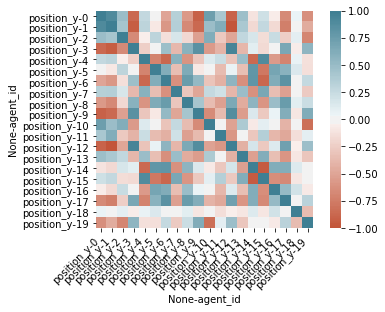

In [24]:
import seaborn as sns

corr = pivot.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [113]:
summary = []

for i in range(5000):
    subset = data[data["step"] == i]
    avrg = np.average(subset["velocity_mag"])
    stdv = np.std(subset["velocity_mag"])
    row = [i, avrg, stdv]
    summary.append(row)
    
summary = pd.DataFrame(summary, columns = ["step", "average", "stand_dev"])


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


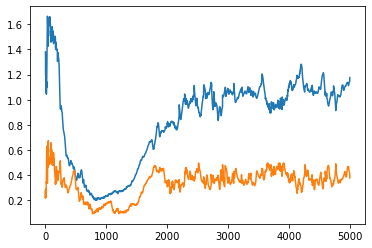

In [114]:
plt.plot(summary.average)
plt.plot(summary.stand_dev)


In [122]:
subset = data[data["step"] == 20]
subset = subset[["position_x", "position_y", "velocity_x", "velocity_y"]]

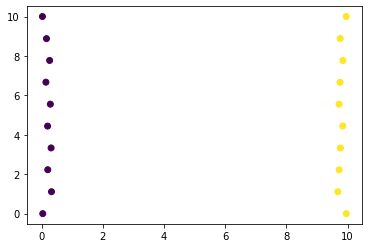

In [123]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(linkage = "average").fit(subset)

plt.scatter(subset["position_x"], subset["position_y"], c = clustering.labels_)

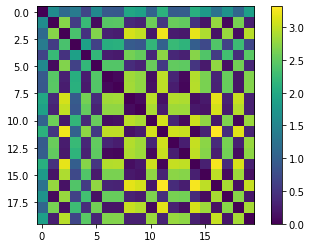

In [62]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(subset)
plt.imshow(dists)
plt.colorbar()

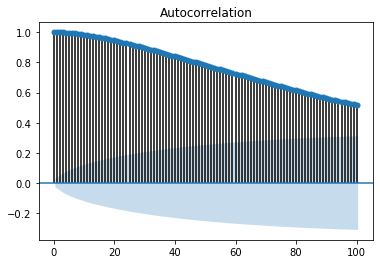

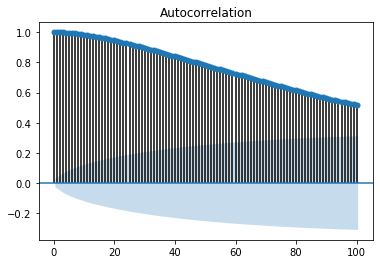

In [75]:
import statsmodels.api as sm

subset = data[data["agent_id"] == 5].velocity_mag.values

sm.graphics.tsa.plot_acf(subset, lags=100)

In [106]:
import csv

num_rect_x = 3
num_rect_y = 4
x = 200
y = 100
space = 10

filename = "borders_grid.csv"

with open(filename, 'a') as csvfile:
    w = csv.writer(csvfile, delimiter=",")
    w.writerow(["id", "shape", "x1", "y1", "x2", "y2"])

    p1 = np.array([0, 0])
    p2 = np.array([x, 0])
    p3 = np.array([x, y])
    p4 = np.array([0, y])

    for i in range(num_rect_x):

        trans = np.array([x + space, 0])
    
        p1 = p1 + trans
        p2 = p2 + trans
        p3 = p3 + trans
        p4 = p4 + trans
        
        j = 0
        p1[1] = 0
        p2[1] = 0
        p3[1] = y
        p4[1] = y
        
        for j in range(num_rect_y):

            trans = np.array([0, y + space])

            p1 = p1 + trans
            p2 = p2 + trans
            p3 = p3 + trans
            p4 = p4 + trans

            side1 = [i+j, "line", p1[0], p1[1], p2[0], p2[1]]
            w.writerow(side1)
            side2 = [i+j+1, "line", p2[0], p2[1], p3[0], p3[1]]
            w.writerow(side2)
            side3 = [i+j+2, "line", p3[0], p3[1], p4[0], p4[1]]
            w.writerow(side3)
            side4 = [i+j+3, "line", p4[0], p4[1], p1[0], p1[1]]
            w.writerow(side4)
            j = j + 1
        i = i + 1

    # for j in range(num_rect_y):

    #     trans = np.array([width + space, 0])

    #     p1 = p1 + trans
    #     p2 = p2 + trans
    #     p3 = p3 + trans
    #     p4 = p4 + trans

    #     side1 = [num_rect_y + j, "line", p1[0], p1[1], p2[0], p2[1]]
    #     w.writerow(side1)
    #     side2 = [num_rect_y + j + 1, "line", p2[0], p2[1], p3[0], p3[1]]
    #     w.writerow(side2)
    #     side3 = [num_rect_y + j + 2, "line", p3[0], p3[1], p4[0], p4[1]]
    #     w.writerow(side3)
    #     side4 = [num_rect_y + j + 3, "line", p4[0], p4[1], p1[0], p1[1]]
    #     w.writerow(side4)
    #     j = j + 1

